In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from PIL import Image
import urllib.request
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load CSV data into a DataFrame
df = pd.read_csv('top6.csv', delimiter=';')
df.set_index('Place', inplace=True)
df["Team Logo"] = df["Team"] + ".png"
df.head()

print(df)

       Logo       Team   M  W  D  L  GF  GA  GD  Points      Team Logo
Place                                                                 
1       NaN    Arsenal  10  6  4  0  21   9  12      22    Arsenal.png
2       NaN   Man City  10  3  6  1  18  12   6      15   Man City.png
3       NaN    Chelsea  10  3  4  3  20  23  -3      13    Chelsea.png
4       NaN  Liverpool  10  2  6  2  16  14   2      12  Liverpool.png
5       NaN  Tottenham  10  2  3  5  16  23  -7       9  Tottenham.png
6       NaN    Man Utd  10  1  3  6  11  21 -10       6    Man Utd.png


(-0.5, 3839.5, 2159.5, -0.5)

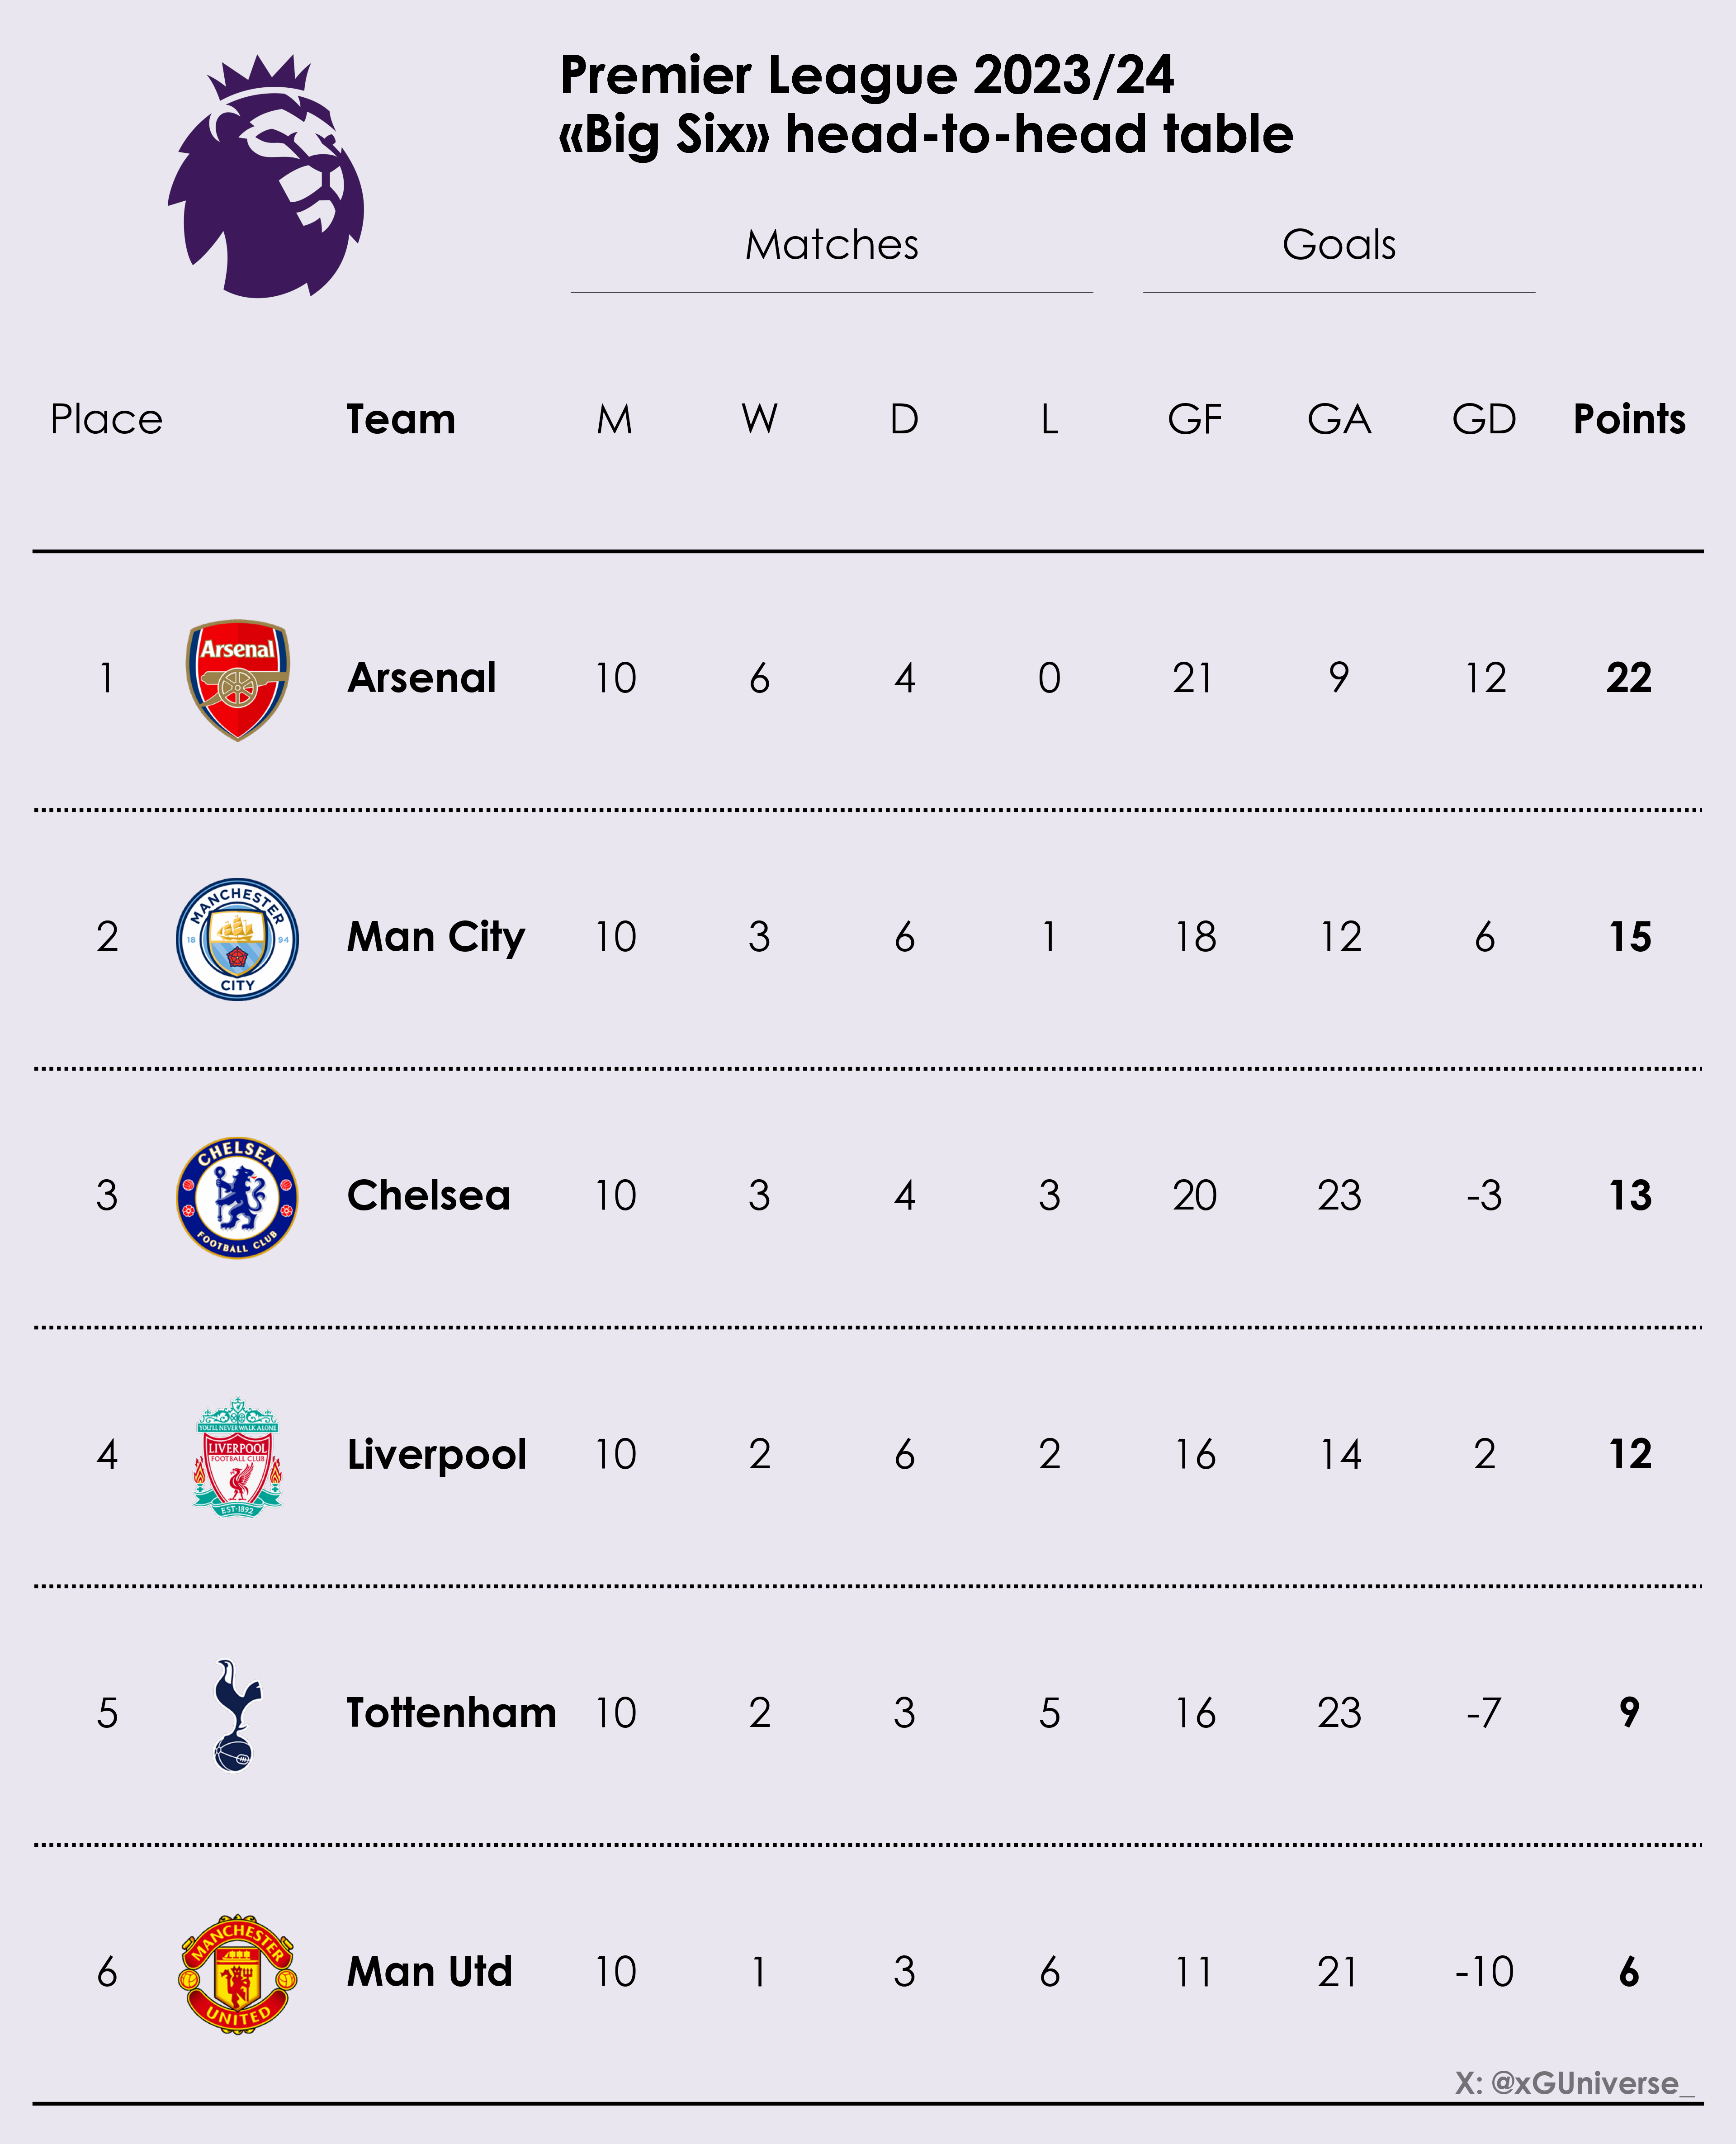

In [5]:
bg_color = "#e9e6ef" # white background
text_color = "#000000" # black text

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "Century Gothic"

# Set up column definitions
col_defs = [
    ColumnDefinition(
        name="Place",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Logo",
        textprops={"ha": "center", "va": "center", "color": bg_color},
        width=0.5,
    ),
    ColumnDefinition(
        name="Team",
        textprops={"ha": "left", "weight": "bold"},
        width=0.75,
    ),
    ColumnDefinition(
        name="M",
        group="Matches",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Points",
        textprops={"ha": "center", "weight": "bold"},
        width=0.5,
    ),
]

# Create figure and axis
fig = plt.figure(figsize=(8,10), dpi=600, facecolor=bg_color)
ax = plt.subplot(111, facecolor=bg_color)

# Add table with plottable
table = Table(
    df.drop(columns=['Team Logo']),
    column_definitions=col_defs,
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 1))},
    footer_divider=True,
    textprops={"fontsize": 11},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
)

# Function to calculate coordinates based on row and column index
def calculate_coordinates(row_index, column_index):
    # position the logos
    x = column_index - 0.3
    y = row_index + 0.5
    return x, y

def add_image(image_path, xy, width, height, zoom):
    img = mpimg.imread(image_path)
    imagebox = OffsetImage(img, zoom=zoom)  # Adjust zoom level here
    ab = AnnotationBbox(imagebox, xy, xycoords='data', frameon=False)
    ax.add_artist(ab)

# Add logos to the table
for i, logo_path in enumerate(df["Team Logo"]):
    x, y = calculate_coordinates(i, 1)  # Adjust column index as needed
    add_image(logo_path, (x, y), width=0.5, height=1, zoom=0.17)  # Adjust width and height as needed


    fig.text(
    x=0.37, y=0.83,
    s='Premier League 2023/24 \n«Big Six» head-to-head table',
    ha='left',
    va='bottom',
    weight='bold',
    size=14
)
# Add watermark
plt.annotate('X: @xGUniverse_', xy=(0.92, 0.015), xycoords='axes fraction', fontsize=8, weight= "bold",
             alpha=0.5, ha='center', va='center')


logo_ax = fig.add_axes([0.13, 0.72, 0.21, 0.21], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"https://logos-world.net/wp-content/uploads/2023/02/Premier-League-Symbol.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

plt.savefig('top6.png', bbox_inches = 'tight')